### Linear Regression

#### SP500 vs. SDS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_sp500 = pd.read_csv("GSPC.csv")
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
Date         251 non-null object
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [3]:
df_sds = pd.read_csv("SDS.csv")
df_sds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
Date         251 non-null object
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000
3,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000
4,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000


In [5]:
df_sp500.set_index('Date', inplace = True) #set Date column as index
df_sp500.index

Index(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07', '2019-01-08',
       '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-14', '2019-01-15',
       ...
       '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
       '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30'],
      dtype='object', name='Date', length=251)

In [6]:
df_sp500.index = pd.to_datetime(df_sp500.index) #change to datetime
df_sp500.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [7]:
#do the same for sds
df_sds.set_index('Date', inplace = True)
df_sds.index

Index(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07', '2019-01-08',
       '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-14', '2019-01-15',
       ...
       '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
       '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30'],
      dtype='object', name='Date', length=251)

In [8]:
df_sds.index = pd.to_datetime(df_sds.index)
df_sds.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [9]:
df_sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000


In [10]:
df_sds.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,44.330002,44.349998,42.540001,42.880001,42.151756,7162500
2019-01-03,43.549999,45.150002,43.480000,44.990002,44.225925,10146600
2019-01-04,43.730000,43.880001,41.700001,41.939999,41.227718,8950700
2019-01-07,41.840000,42.180000,40.779999,41.330002,40.628078,5029400
2019-01-08,40.500000,41.419998,40.349998,40.549999,39.861328,5112500


In [11]:
df_sp500['pct_chg'] = df_sp500['Adj Close'].pct_change()
df_sp500.head(10)

,Open,High,Low,Close,Adj Close,Volume,pct_chg
Date,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,NaN
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000,-0.024757
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000,0.034336
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000,0.007010
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000,0.009695
2019-01-09,2580.000000,2595.320068,2568.889893,2584.959961,2584.959961,4052480000,0.004098
2019-01-10,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000,0.004518
2019-01-11,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000,-0.000146
2019-01-14,2580.310059,2589.320068,2570.409912,2582.610107,2582.610107,3664450000,-0.005258


In [12]:
df_sds['pct_chg'] = df_sds['Adj Close'].pct_change()
df_sds.head(10)

,Open,High,Low,Close,Adj Close,Volume,pct_chg
Date,,,,,,,
2019-01-02,44.330002,44.349998,42.540001,42.880001,42.151756,7162500,NaN
2019-01-03,43.549999,45.150002,43.480000,44.990002,44.225925,10146600,0.049207
2019-01-04,43.730000,43.880001,41.700001,41.939999,41.227718,8950700,-0.067793
2019-01-07,41.840000,42.180000,40.779999,41.330002,40.628078,5029400,-0.014545
2019-01-08,40.500000,41.419998,40.349998,40.549999,39.861328,5112500,-0.018872
2019-01-09,40.270000,40.720001,39.860001,40.169998,39.487774,5726600,-0.009371
2019-01-10,40.700001,40.930000,39.810001,39.869999,39.192879,8460700,-0.007468
2019-01-11,40.259998,40.470001,39.869999,39.880001,39.202709,4252900,0.000251
2019-01-14,40.529999,40.660000,40.090000,40.340000,39.654892,3581700,0.011534


In [13]:
df1 = pd.DataFrame()
df1['sp500_pct_chg'] = df_sp500['pct_chg']
df1['sds_pct_chg'] = df_sds['pct_chg']
df1

,sp500_pct_chg,sds_pct_chg
Date,,
2019-01-02,NaN,NaN
2019-01-03,-0.024757,0.049207
2019-01-04,0.034336,-0.067793
2019-01-07,0.007010,-0.014545
2019-01-08,0.009695,-0.018872
...,...,...
2019-12-23,0.000866,-0.002391
2019-12-24,-0.000195,0.000561
2019-12-26,0.005128,-0.010020


Text(0, 0.5, 'Percent Change')

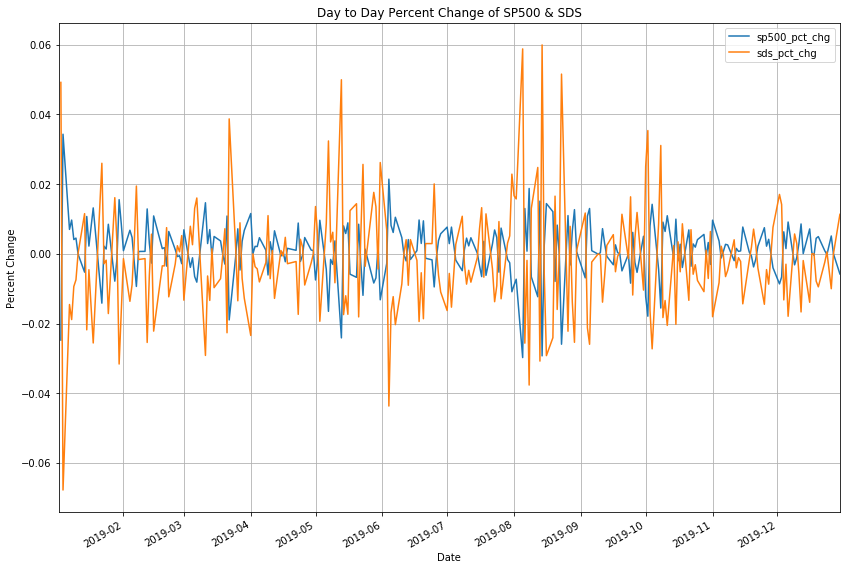

In [14]:
df1.plot(figsize = (14,10), grid = True)
plt.title('Day to Day Percent Change of SP500 & SDS')
plt.ylabel('Percent Change')

In [15]:
#correlation
df1['sp500_pct_chg'].corr(df1['sds_pct_chg'])

-0.9989038061605486

### Regression

In [16]:
from sklearn import linear_model

In [17]:
lin_reg = linear_model.LinearRegression()

In [18]:
#training data
df_sp500['pct_chg'][1:-25]

Date
2019-01-03   -0.024757
2019-01-04    0.034336
2019-01-07    0.007010
2019-01-08    0.009695
2019-01-09    0.004098
                ...   
2019-11-15    0.007695
2019-11-18    0.000503
2019-11-19   -0.000593
2019-11-20   -0.003756
2019-11-21   -0.001583
Name: pct_chg, Length: 225, dtype: float64

In [19]:
#testing data
df_sp500['pct_chg'][-25:]

Date
2019-11-22    0.002175
2019-11-25    0.007507
2019-11-26    0.002196
2019-11-27    0.004174
2019-11-29   -0.004011
2019-12-02   -0.008631
2019-12-03   -0.006638
2019-12-04    0.006324
2019-12-05    0.001500
2019-12-06    0.009136
2019-12-09   -0.003163
2019-12-10   -0.001097
2019-12-11    0.002908
2019-12-12    0.008575
2019-12-13    0.000073
2019-12-16    0.007148
2019-12-17    0.000335
2019-12-18   -0.000432
2019-12-19    0.004459
2019-12-20    0.004945
2019-12-23    0.000866
2019-12-24   -0.000195
2019-12-26    0.005128
2019-12-27    0.000034
2019-12-30   -0.005781
Name: pct_chg, dtype: float64

In [20]:
#need to convert to array
x_train = df_sp500.pct_chg[1:-25].values.reshape(-1,1)
y_train = df_sds.pct_chg[1:-25].values.reshape(-1,1)
x_test = df_sp500.pct_chg[-25:].values.reshape(-1,1)
y_actual = df_sds.pct_chg[-25:].values.reshape(-1,1)

In [21]:
x_train

array([[-2.47567301e-02],
       [ 3.43357143e-02],
       [ 7.01043485e-03],
       [ 9.69528514e-03],
       [ 4.09804552e-03],
       [ 4.51841892e-03],
       [-1.46297914e-04],
       [-5.25752542e-03],
       [ 1.07216889e-02],
       [ 2.22198555e-03],
       [ 7.59140027e-03],
       [ 1.31830530e-02],
       [-1.41573063e-02],
       [ 2.20291284e-03],
       [ 1.37572557e-03],
       [ 8.48869420e-03],
       [-7.84682745e-03],
       [-1.45624671e-03],
       [ 1.55492610e-02],
       [ 8.59739601e-03],
       [ 8.98609856e-04],
       [ 6.77623666e-03],
       [ 4.70842038e-03],
       [-2.22443807e-03],
       [-9.35713993e-03],
       [ 6.76201093e-04],
       [ 7.09103093e-04],
       [ 1.28902245e-02],
       [ 3.02399473e-03],
       [-2.65164162e-03],
       [ 1.08787529e-02],
       [ 1.49874328e-03],
       [ 1.77711061e-03],
       [-3.52643666e-03],
       [ 6.41110237e-03],
       [ 1.23186237e-03],
       [-7.90457069e-04],
       [-5.44049198e-04],
       [-2.8

In [22]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("Intercept:", format(lin_reg.intercept_[0], '.9f'))

Intercept: 0.000090852


In [35]:
print("Slope:", format(lin_reg.coef_[0][0], '.9f'))

Slope: -1.999296498


In [34]:
print("Formula: f(x) = ", format(lin_reg.coef_[0][0], '.9f') + "x + " + format(lin_reg.intercept_[0], '.9f'))

Formula: f(x) =  -1.999296498x + 0.000090852


### Prediction

In [26]:
y_predict = lin_reg.predict(x_test)
y_predict

array([[-4.25748899e-03],
       [-1.49184493e-02],
       [-4.29874390e-03],
       [-8.25505951e-03],
       [ 8.11047026e-03],
       [ 1.73468216e-02],
       [ 1.33623726e-02],
       [-1.25518342e-02],
       [-2.90859469e-03],
       [-1.81741690e-02],
       [ 6.41426995e-03],
       [ 2.28394856e-03],
       [-5.72341768e-03],
       [-1.70535662e-02],
       [-5.42605209e-05],
       [-1.41996895e-02],
       [-5.79496654e-04],
       [ 9.55148570e-04],
       [-8.82459419e-03],
       [-9.79523148e-03],
       [-1.64082551e-03],
       [ 4.81611252e-04],
       [-1.01618732e-02],
       [ 2.29064385e-05],
       [ 1.16484307e-02]])

In [27]:
y_actual

array([[-0.00406801],
       [-0.01448196],
       [-0.00452155],
       [-0.00870553],
       [ 0.00763648],
       [ 0.01705196],
       [ 0.01415795],
       [-0.01322556],
       [-0.00297839],
       [-0.01792392],
       [ 0.00570351],
       [ 0.00302452],
       [-0.00565395],
       [-0.01667932],
       [-0.00192757],
       [-0.01390493],
       [ 0.        ],
       [ 0.        ],
       [-0.0078339 ],
       [-0.00947488],
       [-0.00239139],
       [ 0.00056143],
       [-0.01002005],
       [ 0.        ],
       [ 0.01133596]])

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(y_actual,y_predict)

3.9039291102552594e-07

In [30]:
np.sqrt(mean_squared_error(y_actual,y_predict))

0.0006248143012331952

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(y_actual,y_predict)

0.9953327952649288

Text(0, 0.5, 'SDS Percent Change')

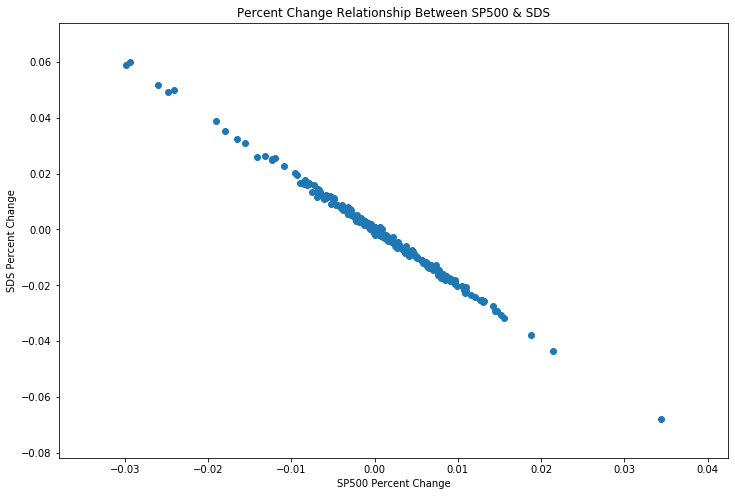

In [33]:
plt.figure(figsize = (12, 8))
plt.scatter(x = df_sp500['pct_chg'], y = df_sds['pct_chg'])
plt.title('Percent Change Relationship Between SP500 & SDS')
plt.xlabel('SP500 Percent Change')
plt.ylabel('SDS Percent Change')

The graph clearly shows the strong negative relationship between the percent change of SP500 and SDS.